## **Implementing Ridge & Lasso Regression**

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Datasets\car_details.csv')
print('Cars dataset head : \n')
data.head(5)

Cars dataset head : 



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
print(f'Dataframe shape : {data.shape[0]} x {data.shape[1]}   (rows x cols)')

Dataframe shape : 4340 x 8   (rows x cols)


In [5]:
# Removing duplicate entries
data.drop_duplicates(keep = 'first', inplace = True)
print(f'Dataframe shape (after dropping duplicates): {data.shape[0]} x {data.shape[1]}   (rows x cols)')

Dataframe shape (after dropping duplicates): 3577 x 8   (rows x cols)


In [6]:
print('Data info : \n')
data.info()

Data info : 

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   year           3577 non-null   int64 
 2   selling_price  3577 non-null   int64 
 3   km_driven      3577 non-null   int64 
 4   fuel           3577 non-null   object
 5   seller_type    3577 non-null   object
 6   transmission   3577 non-null   object
 7   owner          3577 non-null   object
dtypes: int64(3), object(5)
memory usage: 251.5+ KB


In [10]:
print('Statistical analyis of the data : \n')
data.describe(include = 'all')

Statistical analyis of the data : 



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,3577,3577.000000,3.577000e+03,3577.000000,3577,3577,3577,3577
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,54,NaN,NaN,NaN,1800,2832,3265,2218
mean,NaN,2012.962538,4.739125e+05,69250.545709,NaN,NaN,NaN,NaN
std,NaN,4.251759,5.093018e+05,47579.940016,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2010.000000,2.000000e+05,36000.000000,NaN,NaN,NaN,NaN
50%,NaN,2013.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [11]:
# Delete the car name feature
del data['name']

In [13]:
print('Dataset after removing the car name feature : \n')
data.columns

Dataset after removing the car name feature : 



Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [15]:
data = data[['year', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'selling_price']]

# unique values for categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print(f'Categorical features in data : {categorical_features}')

Categorical features in data : Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [23]:
for i in categorical_features:
    print(f'{i.upper()} : {data[i].unique()}')

FUEL : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
SELLER_TYPE : ['Individual' 'Dealer' 'Trustmark Dealer']
TRANSMISSION : ['Manual' 'Automatic']
OWNER : ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [24]:
# Converting categorical features -> independent variables
data = pd.get_dummies(data, drop_first = True)
data.head(5)

,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,60000,False,False,False,True,True,False,True,False,False,False,False
1,2007,50000,135000,False,False,False,True,True,False,True,False,False,False,False
2,2012,100000,600000,True,False,False,False,True,False,True,False,False,False,False
3,2017,46000,250000,False,False,False,True,True,False,True,False,False,False,False
4,2014,141000,450000,True,False,False,False,True,False,True,False,True,False,False


In [26]:
# converting the feature year in terms of number of years 
from datetime import date 
curr_year = date.today().year
data['year'] = curr_year - data['year']

In [27]:
data.head(5)

,year,km_driven,selling_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,17,70000,60000,False,False,False,True,True,False,True,False,False,False,False
1,17,50000,135000,False,False,False,True,True,False,True,False,False,False,False
2,12,100000,600000,True,False,False,False,True,False,True,False,False,False,False
3,7,46000,250000,False,False,False,True,True,False,True,False,False,False,False
4,10,141000,450000,True,False,False,False,True,False,True,False,True,False,False


## *Visualizations*

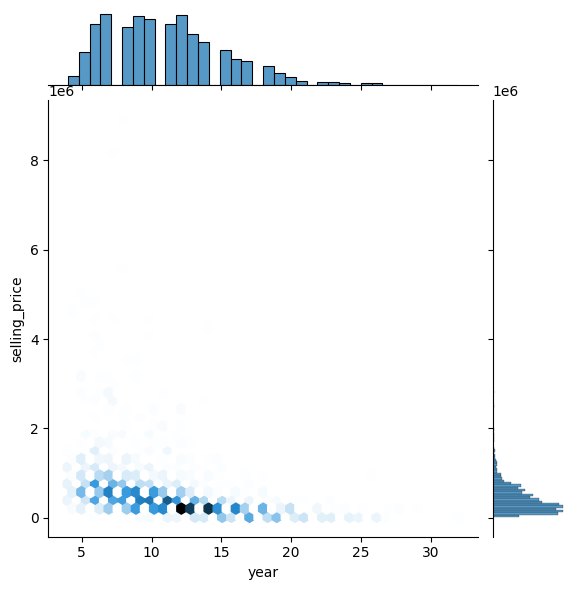

In [30]:
sns.jointplot(x='year', y='selling_price',data = data, kind = 'hex')

<Figure size 2000x2000 with 0 Axes>

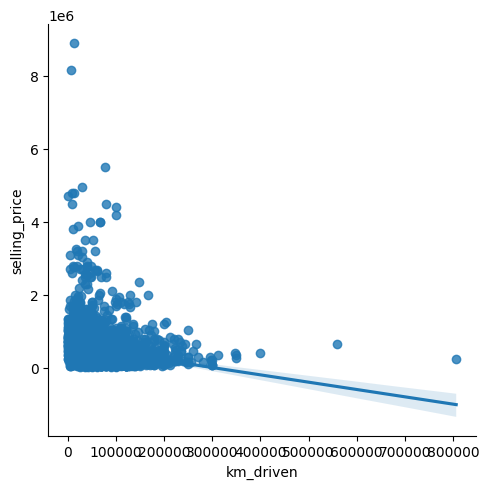

In [32]:
# Shows the inverse relation between km driven and selling price
sns.lmplot(x = 'km_driven', y = 'selling_price', data = data)

In [34]:
# seperating the independent and dependent variables 
X = data.drop(['selling_price'], axis = 1).values 
y = data['selling_price'].values 

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state = 42)

## *Performing Feature Scaling*

In [38]:
columns = data.columns.tolist()
print(f'Total features : {len(columns)}')
columns

Total features : 14


['year',
 'km_driven',
 'selling_price',
 'fuel_Diesel',
 'fuel_Electric',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'owner_Fourth & Above Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

In [39]:
columns.remove('selling_price')

In [44]:
# scaling the km_driven and year feature to small values 
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(y_train.reshape(-1, 1))
y_test = sc.fit_transform(y_test.reshape(-1, 1))

## *Model Building and evaluation*

### *Ridge*

In [45]:
from sklearn.linear_model import Ridge

r_model = Ridge(alpha = 30)
r_model.fit(X_train, y_train)

# Predictions using the test set
ridge_y_pred = r_model.predict(X_test)
print('Coefficients: \n', r_model.coef_)

Coefficients: 
 [[-0.28621337 -0.06491386  0.2281974   0.         -0.00127445 -0.03141944
  -0.03561177  0.00867175 -0.41935618 -0.01466666 -0.04405515  0.03171947
  -0.03376334]]


### *Lasso*

In [46]:
from sklearn.linear_model import Lasso

l_model = Lasso(alpha = 50)
l_model.fit(X_train, y_train)

# Predictions using the test set
lasso_y_pred = l_model.predict(X_test)
print('Coefficients: \n', l_model.coef_)

Coefficients: 
 [-0. -0.  0.  0. -0. -0. -0.  0. -0. -0. -0.  0. -0.]


## *Visualizations and MSE*